# Describing coders profile and career expectations

The goal of this project is to trace personal characteristic such as age, gender, nationality and family structure (on a very shallow level). Besides, we'll also analyze the surveyees current income and what are their expectations for the future. At last, we'll check the most used resources for learning.

## The data

The dataset used for this project is the freeCodeCamp's 2017 New Coder Survey. As you're probably aware, freeCodeCamp is a free e-learning platform that offers courses on web development. Their survey attracted coders from all areas and has 18175 entries. Throughout this project we'll make some observations regarding the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
survey=pd.read_csv('survey.csv',low_memory=False)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns=survey.columns
columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

The dataframe has 136 columns, and going through them I hardly think all of them are useful. Now we'll check
how many of theses columns have a decent amount of values to consider keeping them.

In [5]:
survey['AttendedBootcamp'].value_counts()

0.0    16611
1.0     1098
Name: AttendedBootcamp, dtype: int64

In [6]:
survey['YouTubeMIT'].value_counts()

1.0    3327
Name: YouTubeMIT, dtype: int64

In [7]:
survey['ResourceCodecademy'].value_counts()

1.0    9390
Name: ResourceCodecademy, dtype: int64

In [8]:
survey['PodcastTalkPython'].value_counts()

1.0    655
Name: PodcastTalkPython, dtype: int64

In [9]:
survey['PodcastRubyRogues'].value_counts()

1.0    333
Name: PodcastRubyRogues, dtype: int64

In [10]:
survey['CodeEventHackathons'].value_counts()

1.0    1977
Name: CodeEventHackathons, dtype: int64

Apparently the resource and youtube related columns have a decent amount of data, so we will keep them.On the other hand, the podcasts and bootcamp columns look rather poor. Lets remove them and some others that I dont think will aggregate much.


In [11]:
unwanted=survey.columns[survey.columns.str.startswith('Podcast')]
unwanted=unwanted.append(survey.columns[survey.columns.str.startswith('Part')])
unwanted=unwanted.append(survey.columns[survey.columns.str.startswith('Code')])
unwanted=unwanted.append(survey.columns[survey.columns.str.startswith('Bootcamp')])

In [12]:
survey.drop(unwanted,axis=1,inplace=True)
survey.drop(['AttendedBootcamp'],axis=1,inplace=True)

In [13]:
columns=survey.columns
columns

Index(['Age', 'ChildrenNumber', 'CityPopulation', 'CommuteTime',
       'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender',
       'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y',
       'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits',
       'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWhen',
       'JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci',
       'JobInterestDevOps', 'JobInterestFrontEnd', 'JobInterestFullStack',
       'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile',
       'JobInterestOther', 'JobInterestProjMngr', 'JobInterestQAEngr',
       'JobInterestUX', 'JobPref', 'JobRelocateYesNo', 'JobRoleInterest',
       

# Who answered the survey?
Let's get to know who took the survey.
At the end of this first part, we will know the average age and the most common nationality.

In [14]:
male_ages=survey[survey['Gender']=='male']['Age']
female_ages=survey[survey['Gender']=='female']['Age']
genderqueer_ages=survey[survey['Gender']=='genderqueer']['Age']
trans_ages=survey[survey['Gender']=='trans']['Age']
agender_ages=survey[survey['Gender']=='agender']['Age']
genders=[male_ages,female_ages,genderqueer_ages,trans_ages,agender_ages]
labels=['Male','Female','Genderqueer','Trans','Agender']
colors=['Blue','Orange','Green','Red','Purple']

Text(0.5, 0.98, 'Figure 1: Age distribution for each gender')

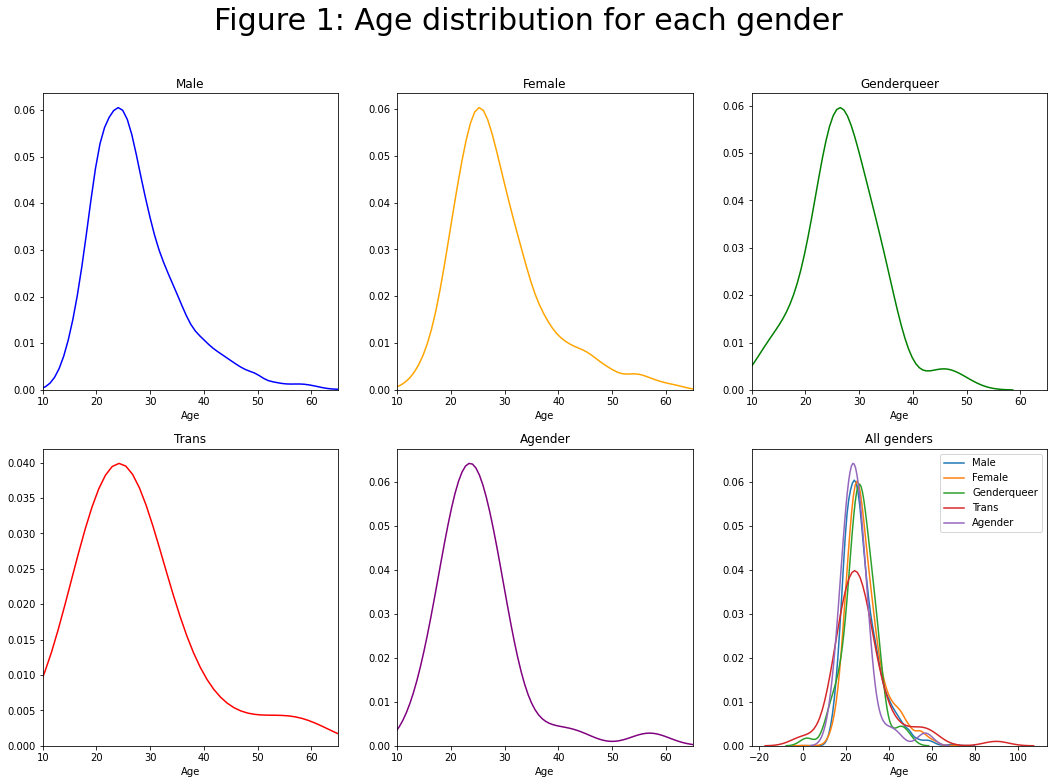

In [15]:
fig=plt.figure(figsize=(18,12))
for i,gender in enumerate(genders):
    plt.subplot(2,3, i+1)         
    sns.distplot(genders[i],hist=False,kde=True,color=colors[i])           
    plt.xlim(10,65)
    plt.title(labels[i])
    if i==4:
        plt.subplot(2,3,6)
        sns.distplot(male_ages,hist=False,kde=True,label='Male')
        sns.distplot(female_ages,hist=False,kde=True,label='Female')
        sns.distplot(genderqueer_ages,hist=False,kde=True,label='Genderqueer')
        sns.distplot(trans_ages,hist=False,kde=True,label='Trans')
        sns.distplot(agender_ages,hist=False,kde=True,label='Agender')      
        plt.title('All genders')
fig.suptitle('Figure 1: Age distribution for each gender',size=30)


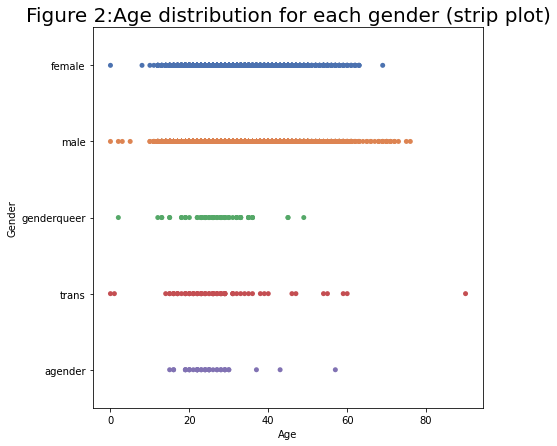

In [16]:
plt.figure(figsize=(7,7))
sns.stripplot(x='Age',y='Gender',data=survey,jitter=False,palette='deep')
plt.title('Figure 2:Age distribution for each gender (strip plot)',size=20)
plt.rcParams.update({'font.size': 10})

In [17]:
total=survey['Gender'].value_counts().sum()
print('Female percentage',round(len(female_ages)/(total),2)*100)
print('Male percentage=',round(len(male_ages)/total,2)*100)

Female percentage 19.0
Male percentage= 80.0


In this survey, we have a total of 5 genders. Male, female, genderqueer, trans and agender. Looking at figure 1, we can see that all the distributions are very simmilar, with most of the programmers being in their late 20s. At figure 2, we can notice the presence of some irrealistic outliers, such as ages near to 0 and near to 80. 

Since males and females make 99% of our data, we will focus on these groups from now on. One possible cause for this is that genders others than 'male' and 'female' might have more difficulty to get into this particular area, but this is not the focus of this study. 

In [18]:
genders_1_pct=['genderqueer','trans','agender']

In [19]:
print('male avg age =',round(male_ages.mean(),2))
print('female avg age =',round(female_ages.mean(),2))

male avg age = 27.42
female avg age = 28.98


Apparently from the plot, female progammers tend to be slightly older than males. This is confirmed by their means above. Maybe female programmers get into the field a little bit later in life.  Also, from Figure 2, we can see that men tend to consistently work after hitting 60 years old, where women tend to stop working (at least in this area) when they hit that mark.

Next, let's see where most programmers live.

In [20]:
top_10_countries=survey['CountryLive'].value_counts().head(10).index


In [21]:
country_and_gender=survey[['CountryLive','Gender']]
country_and_gender=country_and_gender[country_and_gender['CountryLive'].isin(top_10_countries)]
country_and_gender=country_and_gender[~country_and_gender['Gender'].isin(genders_1_pct)]


Text(0.5, 0, 'Programmers')

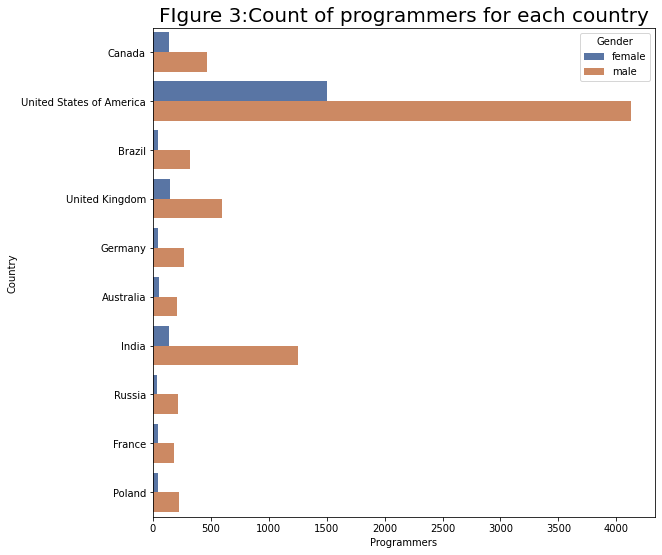

In [22]:
fig=plt.figure(figsize=(9,9))
ax = sns.countplot(y="CountryLive", hue='Gender', data=country_and_gender,palette='deep')
plt.title('FIgure 3:Count of programmers for each country',size=20)
plt.ylabel('Country')
plt.xlabel('Programmers')

In [23]:
survey['kids']= survey['ChildrenNumber'].fillna(0)
survey['kids']= survey['kids'].apply(lambda x:1 if x>0 else x)

Text(0.5, 1.0, 'Figure 4: Percentage of non parents and parents programmers')

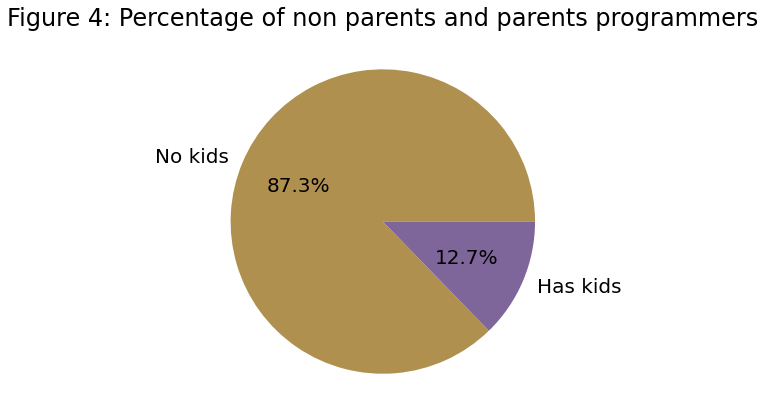

In [24]:
plt.rcParams['font.size'] = 20
survey['kids'].value_counts().plot.pie(figsize=(7,7),autopct='%.1f%%',labels=['No kids','Has kids'],
                                       colors=['#B0904F','#7E659A'])
plt.ylabel('')
plt.title('Figure 4: Percentage of non parents and parents programmers')

Since most programmers are in their late 20's it makes sense that we have a vast majority of non parents.
Now that we've got familiar with nationality, age and family, lets understand more about their background with programming. Some columns that might help us are: 'SchoolMajor','HoursLearning',MonthsProgramming','EmploymentStatus'.

In [25]:
most_common_majors=survey['SchoolMajor'].value_counts().head(10).rename_axis('Majors').reset_index(name='Amount')


Text(0.5, 0, 'Programmers')

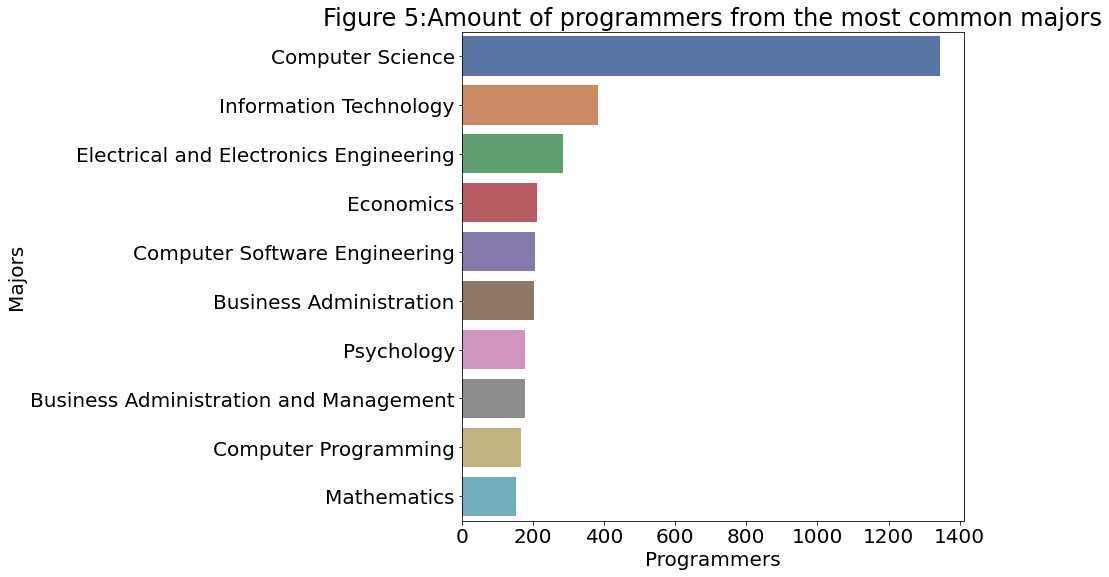

In [26]:
plt.figure(figsize=(9,9))
sns.barplot(y='Majors',x='Amount',data=most_common_majors,palette='deep')
plt.title('Figure 5:Amount of programmers from the most common majors')
plt.xlabel('Programmers')


Unsurprisingly, all the majors are from STEM education (Science,Technology,Engineering and Mathematics)

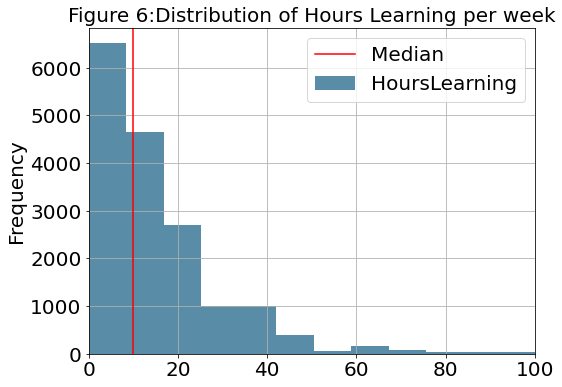

In [27]:
survey['HoursLearning'].plot.hist(grid=True,xlim=[0,100],bins=20,figsize=(8,6),color='#598CA6')
plt.axvline(survey['HoursLearning'].median(),color='Red',label='Median')
plt.title('Figure 6:Distribution of Hours Learning per week',size=20)
plt.legend()

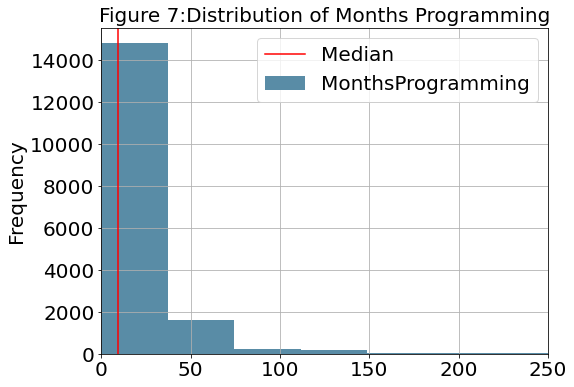

In [28]:
survey['MonthsProgramming'].plot.hist(grid=True,xlim=[0,250],bins=20,figsize=(8,6),color='#598CA6')
plt.axvline(survey['MonthsProgramming'].median(),color='Red',label='Median')
plt.title('Figure 7:Distribution of Months Programming',size=20)
plt.legend()

In [29]:
survey['MonthsProgramming'].median()

9.0

Figures 6 and 7 show us the distributions of hours spent learning programming, and the amount of months that the individuals have been programming, respectively. We can notice that both distributions are extremely right (or positively) skewed, and that's why we're using the median as a measure of central tendency.

Apparently, individuals normally spend around 10 hours per week studying. Which probably accounts for 2h/day, since it's reasonable to think that they take the weekends off. Also, we may notice that those who took the survey are relatively new to progamming, since figure's 7 median corresponds to 9 months. Which makes a lot of sense, because most of the people using freeCodeCamp are new programmers.

Now lets see if they are getting hired.

# Employment status, incomes and future expectations
In this section we'll explore work-related datas, trying to understand the current situation of the surveyees and what are their expectations

In [30]:
survey['EmploymentStatus'].value_counts()

Employed for wages                      7624
Not working but looking for work        3147
Self-employed freelancer                1199
Not working and not looking for work     906
Self-employed business owner             534
Doing an unpaid internship               339
Unable to work                           262
A stay-at-home parent or homemaker       214
Military                                  88
Retired                                   32
Name: EmploymentStatus, dtype: int64

Looks like this column is very detailed, I'm more interested in knowing if they are working or not. Let's work on those values:

In [31]:
working=['Employed for wages','Self-employed freelancer','Self-employed business owner',
         'Doing an unpaid internship','Military']

survey['working_status']=survey['EmploymentStatus'].dropna().apply(
    lambda x:'Working' if x in working else 'Not Working')

Text(0.5, 1.0, 'Figure 8: Employment status')

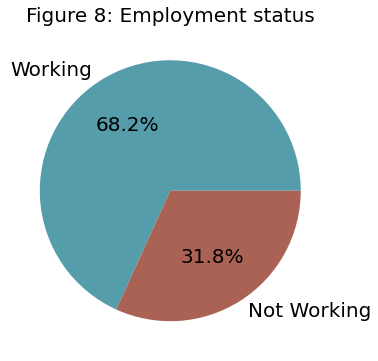

In [32]:
plt.rcParams['font.size'] = 20

survey['working_status'].value_counts().plot.pie(figsize=(6,6),autopct='%.1f%%',labels=['Working','Not Working'],
colors=['#559DAA','#AA6255'])

plt.ylabel('')
plt.title('Figure 8: Employment status',size=20)

It looks like a decent amount of people that took the survey aren't working at the moment. This also makes sense, since most people are still learning and probably trying to make a career change. Now lets see about their incomes.

One important note is that the data is collected from a survey, so the surveyee can answer this question with any number that he likes, making it very susceptible to outliers. We will use Z-scores to remove outliers from our data:

$z=\frac{x-\mu}{\sigma}$

Any value that is more than 2 standard deviations away from the mean will be removed, i.e z=2

In [57]:
max_income_value=2*(survey['Income'].std())+(survey['Income'].mean())
print(max_income_value)

166793.94440858578


In [67]:
income_no_outliers=survey[survey['Income']<max_income_value]

In [68]:
income_no_outliers['Income'].describe()

count      7513.000000
mean      38165.145348
std       27210.913405
min        6000.000000
25%       16000.000000
50%       32000.000000
75%       52000.000000
max      165000.000000
Name: Income, dtype: float64

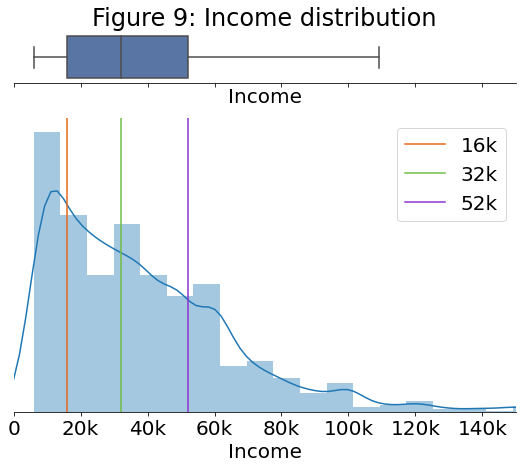

In [70]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},figsize=(9,7))

sns.boxplot(income_no_outliers['Income'],showfliers=False, ax=ax_box,whis=1.6,palette='deep')
sns.distplot(income_no_outliers['Income'], ax=ax_hist,bins=20)
new_xticks=['0','20k','40k','60k','80k','100k','120k','140k']
ax_box.set(title='Figure 9: Income distribution')
ax_box.set(yticks=[])
ax_hist.set(yticks=[])
ax_hist.set_xticklabels(new_xticks)
plt.xticks
sns.despine(ax=ax_hist,left=True)
sns.despine(ax=ax_box, left=True)
plt.xlim([0,150000])
plt.ylabel('')
plt.axvline(16000,color='#E76618',label='16k')
plt.axvline(32000,color='#71BC43',label='32k')
plt.axvline(52000,color='#8F31CE',label='52k')
plt.legend()


Figure 9 shows us two plots displaying the income distribution. This is what we take from the figure:
- <25% of our values are below 16k
- 25% - 50% of our values are in between 16k and 32k (the latter being our median)
- 50% - 75% of our values are in between 32k and 52k
- \>75% of our values are above 52k

Once again our density plot is positively skewed, and that's why we chose the median. 

Now lets compare to what they expect to earn.

Let's use the same reasoning to remove the outliers.

In [73]:
max_expected_value=2*(survey['ExpectedEarning'].std())+(survey['ExpectedEarning'].mean())
print(max_expected_value)

205792.6201496017


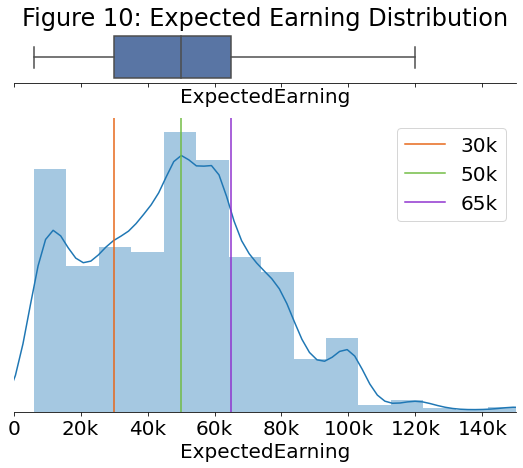

In [76]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},figsize=(9,7))

sns.boxplot(expected_no_outliers['ExpectedEarning'],showfliers=False, ax=ax_box,whis=1.6,palette='deep')
sns.distplot(expected_no_outliers['ExpectedEarning'], ax=ax_hist,bins=20)
new_xticks2=['0','20k','40k','60k','80k','100k','120k','140k']
ax_box.set(title='Figure 10: Expected Earning Distribution')
ax_box.set(yticks=[])
ax_hist.set(yticks=[])
ax_hist.set_xticklabels(new_xticks2)
plt.xticks
sns.despine(ax=ax_hist,left=True)
sns.despine(ax=ax_box, left=True)
plt.xlim([0,150000])
plt.ylabel('')
plt.axvline(30000,color='#E76618',label='30k')
plt.axvline(50000,color='#71BC43',label='50k')
plt.axvline(65000,color='#8F31CE',label='65k')
plt.legend()

It looks like the surveyees have an optimistic approach towards the future. All of our percentiles increased considerably. The median shifted from 32k to 50k (an increase of 36%). Making the same analysis as before, this is what we get:

- <25% of our values are below 30k
- 25% - 50% of our values are in between 30k and 50k (the latter being our median)
- 50% - 75% of our values are in between 50k and 65k
- \>75% of our values are above 65k


Now that we know their current situation financial situation and what are their hopes for the future, lets take a look at their career preferences, and see if different career paths project different earning expectations.

In [35]:
jobsinterests=survey[survey.columns[survey.columns.str.startswith('JobI')]]
jobs_interests=pd.DataFrame(jobsinterests.apply(pd.Series.value_counts).iloc[0].sort_values(ascending=False).head())
fields=['FullStack','FrontEnd','BackEnd','Mobile','DataScience']
jobs_interests.insert(loc=0, column='Fields', value=fields)

Text(0.5, 1.0, 'Figure 11:Most desired careers')

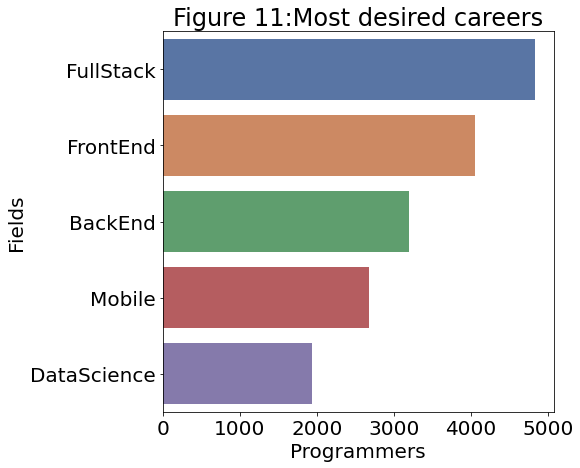

In [36]:
plt.figure(figsize=(7,7))
sns.barplot(y='Fields',x=1,data=jobs_interests,palette='deep')
plt.xlabel('Programmers')
plt.title('Figure 11:Most desired careers')


It looks like web development (fullstack,front and backend) wins by a mile, and data science is the least desired between these 5. 

In [37]:
new_columns=['ExpectedEarning','FullStack','FrontEnd','BackEnd','Mobile','DataScience']
temp_df=survey[['ExpectedEarning','JobInterestFullStack','JobInterestFrontEnd','JobInterestBackEnd','JobInterestMobile',
         'JobInterestDataSci']]
temp_df.columns=new_columns
temp_df

,ExpectedEarning,FullStack,FrontEnd,BackEnd,Mobile,DataScience
0,NaN,NaN,NaN,NaN,NaN,NaN
1,35000.0,1.0,NaN,NaN,NaN,NaN
2,70000.0,1.0,1.0,1.0,1.0,NaN
3,40000.0,1.0,1.0,1.0,NaN,NaN
4,140000.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...
18170,NaN,NaN,NaN,NaN,NaN,NaN
18171,70000.0,1.0,1.0,1.0,1.0,1.0
18172,NaN,NaN,NaN,NaN,NaN,NaN
18173,NaN,NaN,NaN,NaN,NaN,NaN


This data frame as it is won't help us much. The desired date frame is one that we can clearly relate the Expected Earning to each field. We will do that by melting the data frame:

In [38]:
desired_df=pd.melt(temp_df,id_vars=['ExpectedEarning'])

In [39]:
desired_df

,ExpectedEarning,variable,value
0,NaN,FullStack,NaN
1,35000.0,FullStack,1.0
2,70000.0,FullStack,1.0
3,40000.0,FullStack,1.0
4,140000.0,FullStack,1.0
...,...,...,...
90870,NaN,DataScience,NaN
90871,70000.0,DataScience,1.0
90872,NaN,DataScience,NaN
90873,NaN,DataScience,NaN


This looks better. Also, we are only interested in the rows with 1.0 value, lets clean it more.

In [40]:
desired_df=desired_df[desired_df['value'].notna()]

In [41]:
desired_df

,ExpectedEarning,variable,value
1,35000.0,FullStack,1.0
2,70000.0,FullStack,1.0
3,40000.0,FullStack,1.0
4,140000.0,FullStack,1.0
6,30000.0,FullStack,1.0
...,...,...,...
90830,70000.0,DataScience,1.0
90862,12000.0,DataScience,1.0
90863,100000.0,DataScience,1.0
90871,70000.0,DataScience,1.0


Text(0.5, 1.0, 'Figure 12:Earning expectations for each field')

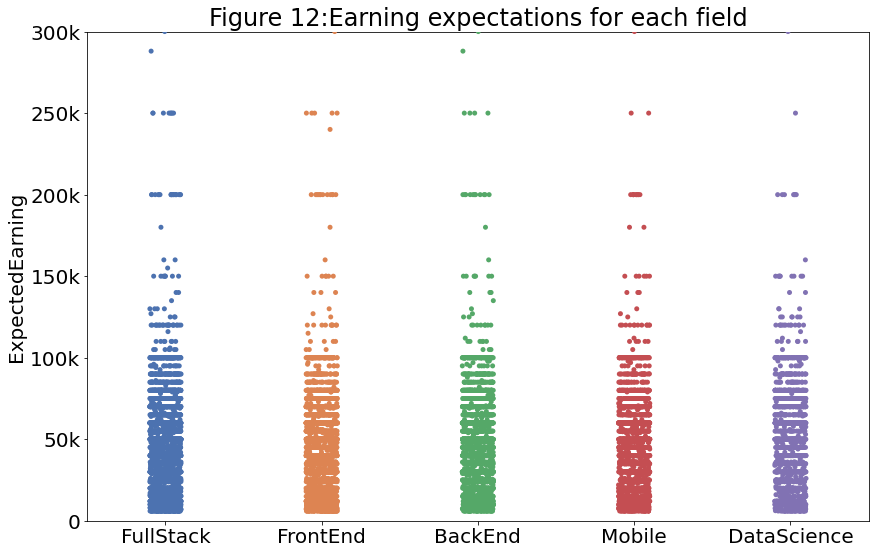

In [42]:
fig,ax=plt.subplots(figsize=(14,9))
sns.stripplot(x='variable',y='ExpectedEarning',data=desired_df,palette='deep')
plt.ylim([0,300000])
plt.xlabel('')
new_yticks=['0','50k','100k','150k','200k','250k','300k']
ax.set_yticklabels(new_yticks)
plt.title('Figure 12:Earning expectations for each field')

Once we had our data cleaned and organized, we were able to plot figure 12, enabling us to visualize the earning expectations for each field. The plots are extremely simmilar to each other, with most of the times ranging between 0 and 100k. We can safely assume that the simmilar pattern is due to the fact that a single person can choose more than 1 field, and as we're talking about new programmers, they might be looking for a job in any (and every) of those fields. Once again we restrained our range due to the unrealistic outliers.

Due to the nature of the data collection, this particular information won't be of much use.

# Learning Resources
In this section, we'll get to know more about the learning resourcers that these programmers are using the most.

In [43]:
#findingthe top 5 courses and yt channels

resources_names=survey[survey.columns[survey.columns.str.startswith('Resource')]]
resources=pd.DataFrame(resources_names.apply(pd.Series.value_counts).iloc[0].sort_values(ascending=False).head())
resources.index=['FCC','SO','W3S','CodeAcademy','MDN']
resources.columns=['count']
yt_names=survey[survey.columns[survey.columns.str.startswith('You')]]
yt=pd.DataFrame(yt_names.apply(pd.Series.value_counts).iloc[0].sort_values(ascending=False).head())
yt.index=['FCC','GoogleDev','MIT','TheNewBoston','LearnCode']
yt.columns=['count']

Text(0.5, 1.0, 'Figure 13:Web Resources for learning')

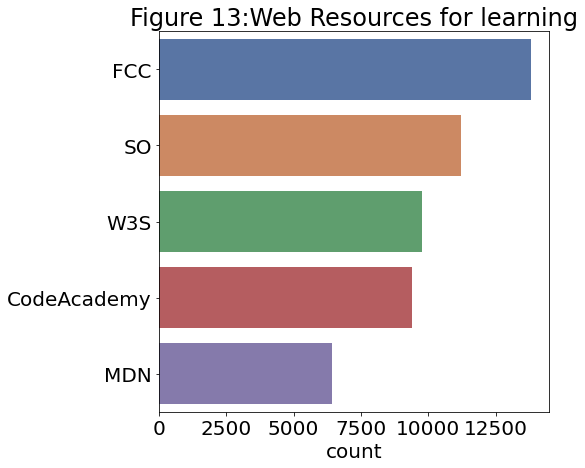

In [44]:
fig=plt.figure(figsize=(7,7))
sns.barplot(y=resources.index,x='count',data=resources,palette='deep')
plt.title('Figure 13:Web Resources for learning')

Text(0.5, 1.0, 'Figure 14:Youtube resources for learning')

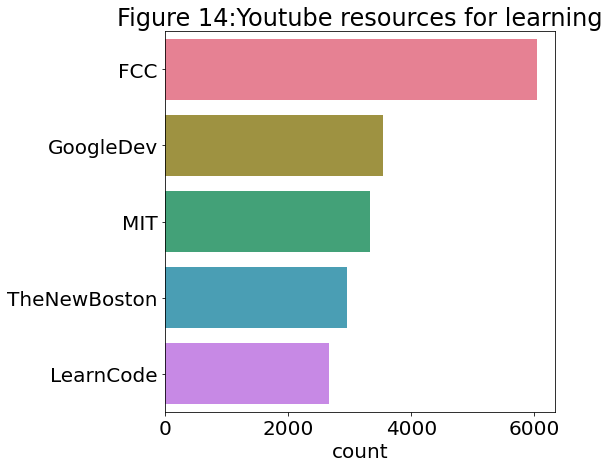

In [45]:
fig=plt.figure(figsize=(7,7))
sns.barplot(y=yt.index,x='count',data=yt,palette='husl')
plt.title('Figure 14:Youtube resources for learning')

As expected, freeCodeCamp is winning by far in both segments, since they conducted the survey (its more likely to see the survey being a FCC user). Also, its worth noting that the websites are much more used than youtube videos:

In [46]:
print('FCC+SO=',resources.iloc[0,0]+resources.iloc[1,0])
print('Top5 yt sum=',yt['count'].sum())

FCC+SO= 25010.0
Top5 yt sum= 18524.0


As we can see in the cell above,freeCodeCamp and StackOverflow surpasses all the 5 youtube channels combined.

# Conclusion

We've done a fair amount of data analysis so far. We've concluded the following about the average surveyee:
- Is a relatively new programmer (9 months)
- Is in between 27 and 28 years old
- Has 1 in 5 chance of being female
- Has an income of 32k
- Expects to earn 36% more of their current income.
- Wants to build a career in web development
- Rathers using websites such as freeCodeCamp and StackOverflow over using youtube channels for learning.

This was a great opportunity to learn a little bit more about the field I'm getting into, while also being able to put in practice some theory.